<a href="https://colab.research.google.com/github/nirajkhot/Data-Science/blob/master/Recommendation%20System/Basic_Recommendation_sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setting up kaggle with colab**

**[Google Colaboratory and Kaggle datasets](https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8)**

In [4]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!dir

kaggle.json  sample_data


In [0]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [6]:
!ls

kaggle.json  sample_data


In [9]:
!kaggle datasets download tmdb/tmdb-movie-metadata -f tmdb_5000_movies.csv
!kaggle datasets download tmdb/tmdb-movie-metadata -f tmdb_5000_credits.csv

  0% 0.00/1.58M [00:00<?, ?B/s]
100% 1.58M/1.58M [00:00<00:00, 53.1MB/s]
 68% 5.00M/7.30M [00:00<00:00, 23.4MB/s]
100% 7.30M/7.30M [00:00<00:00, 29.0MB/s]


# **Load Dataset**

In [0]:
# Import pandas 
import pandas as pd

# Import the test and train datasets into pandas dataframe
df_credits = pd.read_csv('tmdb_5000_credits.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df_movies = pd.read_csv('tmdb_5000_movies.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [11]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# **Clean Dataset**

In [13]:
df_credits = df_credits.rename(index=str, columns={"movie_id":"id"})
df = df_movies.merge(df_credits, on='id')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
df = df.drop(columns=['homepage','title_x','title_y','status','production_companies','production_countries'])
df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **1. Find weighted average for each movie Average Rating**

## Formula for weighted avg

W = ((R*v)+(C*m))/(v+m)

In [0]:
R=df['vote_average']
v=df['vote_count']
C=df['vote_average'].mean()
m=df['vote_count'].quantile(0.70)

In [16]:
df['weighted_avg'] = ((R*v)+(C*m))/(v+m)
df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148013
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807627
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276075
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.509565
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.098319


In [19]:
# Sort movies based on weighted avg
df_sorted = df.sort_values('weighted_avg',ascending=False)
df_sorted[['original_title','vote_count', 'vote_average', 'weighted_avg', 'popularity']].head()

,original_title,vote_count,vote_average,weighted_avg,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927


### Visualation 

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

#**2. Top movies based on avg_votes (weighted avg)**

Text(0, 0.5, 'Movie Title')

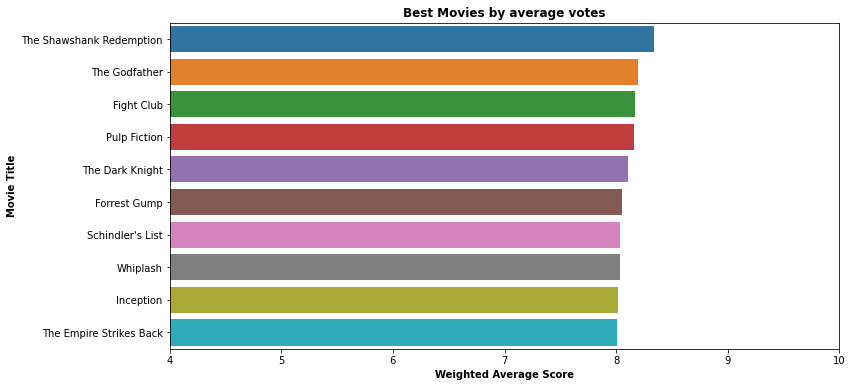

In [33]:
weight_average=df_sorted.sort_values('weighted_avg',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_avg'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

#**3. Top movies based on popularity**

In [30]:
popularity_df=df_sorted.sort_values('popularity',ascending=False)
popularity_df[['original_title','vote_count', 'vote_average', 'weighted_avg', 'popularity']].head(10)

,original_title,vote_count,vote_average,weighted_avg,popularity
546,Minions,4571,6.4,6.365286,875.581305
95,Interstellar,10867,8.1,7.998100,724.247784
788,Deadpool,10995,7.4,7.334360,514.569956
94,Guardians of the Galaxy,9742,7.9,7.798252,481.098624
127,Mad Max: Fury Road,9427,7.2,7.135687,434.278564
28,Jurassic World,8662,6.5,6.474365,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,6985,7.5,7.391892,271.972889
82,Dawn of the Planet of the Apes,4410,7.3,7.159397,243.791743
200,The Hunger Games: Mockingjay - Part 1,5584,6.6,6.552141,206.227151
88,Big Hero 6,6135,7.8,7.652256,203.734590


Text(0, 0.5, 'Movie Title')

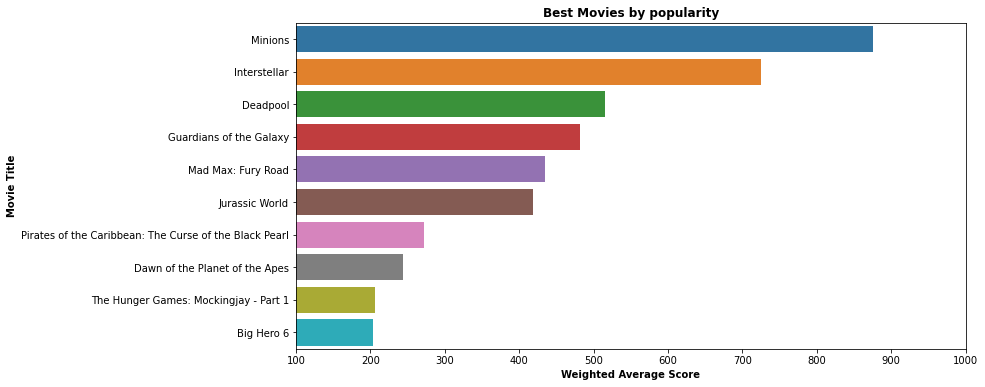

In [31]:
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=popularity_df['popularity'].head(10), y=popularity_df['original_title'].head(10), data=popularity_df)
plt.xlim(100, 1000)
plt.title('Best Movies by popularity', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')


#**4. Top movies based on scaled weighted avg and popularity score (priority given 50% both)**

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaling=MinMaxScaler()
scaled_df =scaling.fit_transform(df[['weighted_avg','popularity']])
norm_df = pd.DataFrame(scaled_df,columns=['weighted_avg','popularity'])
norm_df.head()

,weighted_avg,popularity
0,0.906439,0.827162
1,0.460630,1.000000
2,0.851874,0.549462
3,0.725217,0.587690
4,0.670973,0.495989


In [49]:
df[['nz_weighted_avg','nz_popularity']] = norm_df
df[['original_title','weighted_avg','popularity','nz_weighted_avg','nz_popularity']].head(10)

,original_title,weighted_avg,popularity,nz_weighted_avg,nz_popularity
95,Interstellar,7.998100,724.247784,0.787147,0.064829
546,Minions,6.365286,875.581305,0.562580,0.026611
94,Guardians of the Galaxy,7.798252,481.098624,0.782743,0.069876
788,Deadpool,7.334360,514.569956,0.497778,0.036311
127,Mad Max: Fury Road,7.135687,434.278564,0.755133,0.062940
1881,The Shawshank Redemption,8.340775,136.747729,0.412480,0.008235
65,The Dark Knight,8.102674,187.322927,0.870864,0.020757
3865,Whiplash,8.034695,192.528841,0.368037,0.007306
3337,The Godfather,8.192887,143.659698,0.385038,0.000153
662,Fight Club,8.171648,146.757391,0.530355,0.029776


Top 10 movies based on sclaed weighted avg and popluarity score

In [67]:
df['score'] = df['nz_weighted_avg']*0.5 + df['nz_popularity']*0.5
score_df = df.sort_values('score',ascending=False)
score_df[['original_title','nz_weighted_avg','nz_popularity','score']].head(10)

,original_title,nz_weighted_avg,nz_popularity,score
0,Avatar,0.906439,0.827162,0.866801
1,Pirates of the Caribbean: At World's End,0.460630,1.000000,0.730315
2,Spectre,0.851874,0.549462,0.700668
3,The Dark Knight Rises,0.725217,0.587690,0.656453
4,John Carter,0.670973,0.495989,0.583481
5,Spider-Man 3,1.000000,0.156179,0.578090
6,Tangled,0.934991,0.213941,0.574466
7,Avengers: Age of Ultron,0.916431,0.219887,0.568159
8,Harry Potter and the Half-Blood Prince,0.959622,0.164074,0.561848
9,Batman v Superman: Dawn of Justice,0.953823,0.167611,0.560717


Text(0, 0.5, 'Movie Title')

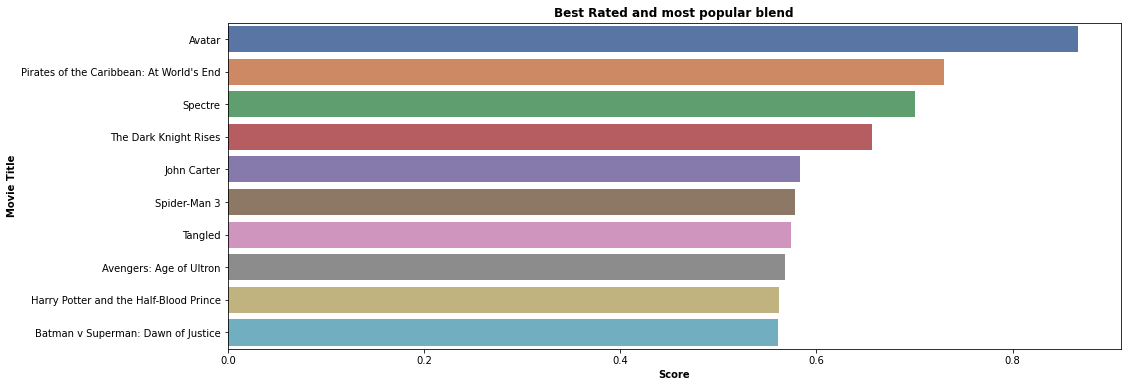

In [62]:
plt.figure(figsize=(1,6))
# axis1=sns.barplot(x=score_df['score'].head(10), y=score_df['original_title'].head(10), data=score_df)
ax = sns.barplot(x=score_df['score'].head(10), y=score_df['original_title'].head(10), data=score_df, palette='deep')
# plt.xlim(0,1)
plt.title('Best Rated and most popular blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

# **5. Content Based Recommendation System**
Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [65]:
df.head(1)['overview']

95    Interstellar chronicles the adventures of a gr...
Name: overview, dtype: object